<a href="https://colab.research.google.com/github/raeubaen/ml/blob/master/Bayesian_Cheating_Detection-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Cheating Detection

## Strategia

Consideriamo un gioco a tempo in cui S squadre devono risolvere N indizi $i_1,\, \dots, i_N$, che vengono forniti in un ordine non specificato, diverso per ogni squadra. 
Supponiamo di possedere i dati relativi ai tempi assoluti in cui le squadre ricevono gli indizi da risolvere da parte del comitato. La numerazione degli indizi viene intesa rispetto alla squadra vincente. Nel nostro caso, ad esempio, l'indizio $i_{25}$, cioè il $25$-esimo dei `new team`, era "Tessuto", meglio noto come "Cencio".
Indichiamo come $I_i^{(s, t)}$ l'evento: le squadre $s$ e $t$ hanno collaborato durante la soluzione (o una ha comunicato la soluzione all'altra) dell'indizio $i$. Gli eventi $NI$, al contrario, indicano una non-collaborazione. Se un evento $I_i^{(s, t)}$ si è verificato, ci aspettiamo che, nei dati in nostro possesso, la differenza nei tempi assoluti di soluzione dell'indizio $i$ tra le due squadre $s$ e $t$ sia piccola rispetto al caso $NI_i^{(s, t)}$. E' proprio questo ragionamento che ci consente di stimare il rapporto tra la probabilità di $I_i^{(s, t)}$ e di $NI_i^{(s, t)}$, entrambe condizionate all'osservazione di tempi assoluti $t^s_i$ e $t^t_i$ per gli indizi da $i_1$ a $i_N$, sulla base dei dati in nostro possesso. Tale rapporto rappresenta il fattore di Bayes dell'ipotesi $I_i^{(s, t)}$ rispetto alla $NI_i^{(s, t)}$, inferito a partire dai nostri dati. 
<br>Scendiamo più nel dettaglio.
<br>
Siano $P(D | I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2})$ e $P(D | NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2})$ le probabilità condizionate di osservare i tempi contenuti nei dati a nostra disposizione nelle due ipotesi di collaborazione e non collaborazione tra le squadre $s$ e $t$ durante la soluzione degli indizi compresi fra $i_1$ e $i_2$. Chiaramente supponiamo che, tra $i_1$ e $i_2$, le due squadre abbiano ricevuto gli indizi nello stesso ordine.
In particolare, dette $\Delta T^{(s, t)}_{i_1} \dots \Delta T^{(s, t)}_{i_2} $ le differenze nei tempi assoluti di soluzione tra le squadre $s$ e $t$ per gli indizi compresi fra $i_1$ e $i_2$, consideriamo $D$ come l'evento $ \forall i \in [i_1, i_2] \quad |\pmb{\Delta T}^{(s, t)}_i| < \max\limits_{j \in [i_1, i_2]} (|(\Delta t^{\mathrm{obs}})^{(s, t)}_j|) = M$, indicando con $|\pmb{\Delta T}^{(s, t)}_i|$ la relativa variabile casuale.
<br>
Nel caso di non collaborazione, possiamo assumere (grazie ad un test di normalità Kolmogorov-Smirnov eseguito sui dati - vedi codice) che le differenze siano distribuite in modo gaussiano, con media $\mu$ e dev. st. $\sigma$ inferite a partire da tutti gli indizi. 
Quindi:
$P(D | NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2}) = \prod\limits_{i = i_1, \, \dots, i_2} P(|\Delta t^{(s, t)}_i| < M) $ con $\Delta t^{(s, t)}_i \sim \mathrm{Norm}(\mu, \sigma) \forall i$

Nel caso di collaborazione, possiamo assumere che le differenze $\Delta t^{(s, t)}_i$ siano distribuite in modo uniforme tra due valori $\mp a$, ossia che:
$P(D | I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2}) = \prod\limits_{i = i_1, ..., i_2}P(|\Delta t^{(s, t)}_i| < M) $ con $\Delta t^{(s, t)}_i \sim \mathrm{Uniform}(-a, a) \quad \forall i \in [i_i, i_2]$

Se necessario, l'uniforme può essere sostituita da qualsiasi altra distribuzione che rappresenti meglio il fenomeno.

Assumiamo, prima di fare inferenza dai dati, che il rapporto tra le probabilità a priori di collaborazione e di non collaborazione sia un numero $p$. 
Nel caso di ignoranza totale rispetto alla validità di una ipotesi o dell'altra, si prende solitamente $p = 1$. 
Poichè noi NON abbiamo sospetti a priori, anzi supponiamo che sia improbabile una collaborazione tra le squadre, assumiamo $p = 0.01 = 1 \%$.
Il likelihood ratio finale $\mathrm{LR} = \frac{P(D | I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2})}{P(D | NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2})}$  che si ottiene, riguardo alla collaborazione tra `skuato` e `corsari` dal loro 24-esimo indizio fino al 29-esimo, è maggiore di 14000. Perfino con questa ipotesi iniziale di presunta onestà, quindi, si ottiene un fattore di bayes $$bf = \frac{P(I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2} | D)}{P(NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2} | D)} = \frac{P(D | I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2}) P(I^{(s, t)}_{i_1} \dots I^{(s, t)}_{i_2} )}{P(D | NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2}) P(NI^{(s, t)}_{i_1} \dots NI^{(s, t)}_{i_2} )} = \mathrm{LR} \cdot p = 140$$che è maggiore della soglia di 100 che si considera comunemente. *(Jeffreys, Harold (1998) [1961]. The Theory of Probability (3rd ed.). Oxford, England. p. 432. ISBN 9780191589676.)*

Iniziamo l'analisi eseguendo uno scatter plot dei tempi assoluti nei quali le squadre hanno risolto ciascun indizio.

In [1]:
# Importing external modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from scipy import stats

# Graphics settings
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f7f9fc'

# Suppress warnings
# should run only when the program has already been tested
import warnings
#warnings.filterwarnings("ignore")

In [2]:
###---------------------------------
# Parsing excel files
path = os.getcwd()
files = os.listdir(path)

excel_files = [
  f for f in files 
  if f[-4:] == 'xlsx' and f[:3]!="hsl"
]
team_num = len(excel_files)

# Dictionary with teams as keys 
# and their Dataframes (containing minutes read from excel) as values
dfs = {
  f[:-5]: pd.read_excel(f, usecols=[
    "nome indizio", "minuti da inizio", "minuti impiegati",
  ])
  for f in excel_files
}

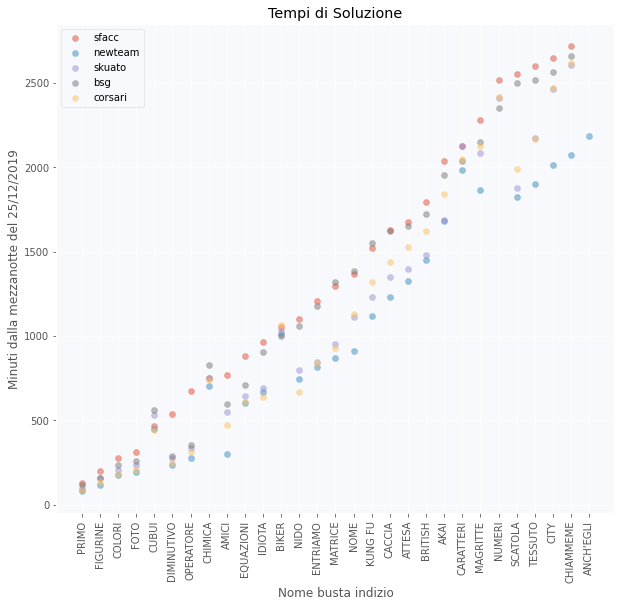

In [3]:
###--------------------------------------------
# Plotting minfromstart on (y) and riddle names on (x) for each team
missing = ["MIAO", "FINALCOUNTDOWN", "PASSEGGIATA"] # riddles not solved by all teams analyzed

fig, ax = plt.subplots(figsize=(10, 10))
for f, df in dfs.items():
  # renaming columns in
  #   -riddle: riddle titles,
  #   -mins:    minutes from start,
  #      referred to the moments when the teams received the riddles (m1, ...)
  #   -dmin:   minutes taken to solve riddles (m2-m1, ...)
  df.rename(columns={
    'nome indizio':     'riddle',
    'minuti da inizio': 'mins',
    'minuti impiegati': 'dmin',
  }, inplace=True)
  # dropping rows with nan values 
  df.dropna(inplace=True)
  # excluding riddles in the missing list
  for m in missing:
    df = df[df.riddle != m] 
  # sorting by mins
  df.sort_values(by=['mins'], inplace=True)
  # copying the index into a column to number riddles 
  df['num'] = df.index
  # re-assigning to the dictionary
  dfs[f] = df
  # scatter plot
  ax.scatter(
    df.riddle.to_numpy()[:-1], df.mins.to_numpy()[1:], 
    label=f, alpha=0.5
  )

plt.xticks(rotation=90)
plt.legend()
ax.set(xlabel="Nome busta indizio", ylabel="Minuti dalla mezzanotte del 25/12/2019",)
fig.subplots_adjust(bottom=0.2)
plt.title("Tempi di Soluzione")
plt.savefig("times.pdf")
plt.show() #blocking
plt.close()

Costruiamo ora il modello gaussiano per le differenze tra i tempi di risoluzione per ciascuna coppia di squadre, semplicemente calcolandone la media e la dev. st. La validità del modello verrà provata tramite il test di Kolmogorov-Smirnov (vedi codice). Plotteremo inoltre gli istogrammi delle differenze di tempo, indicando i $p-value$ del suddetto test, sovrapponendovi le relative pdf gaussiane. 

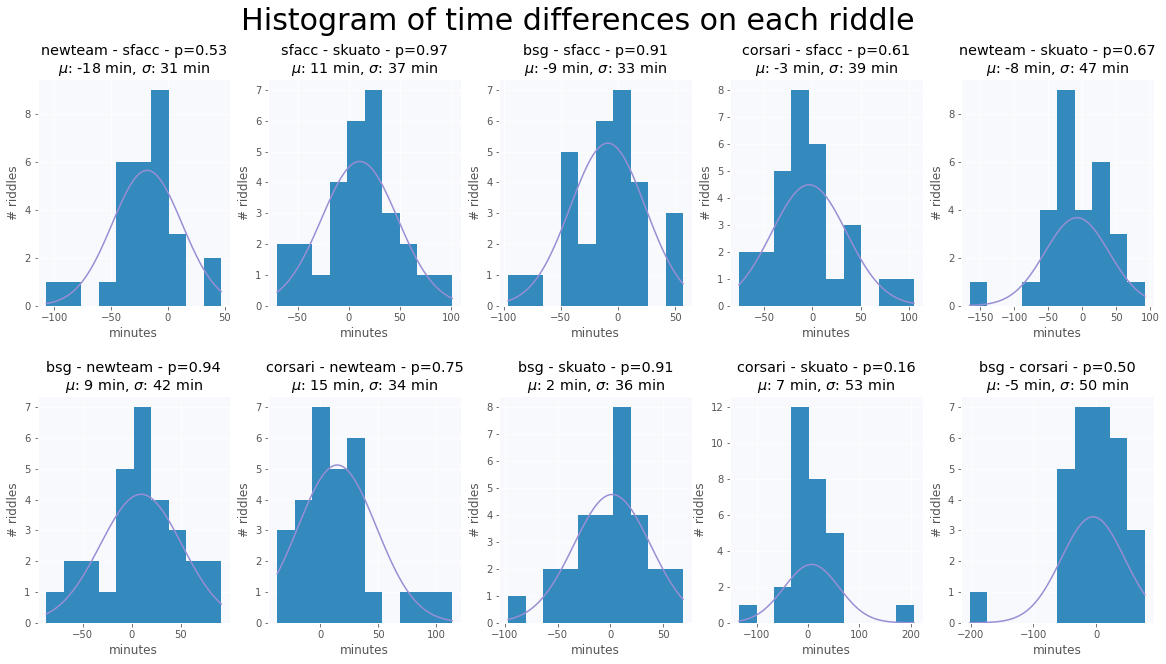

In [13]:
###-------------------------------------...................................
# Constructing a gaussian model for the differences between all pairs of teams 
# in the time taken to solve each riddle 

# ordering by riddle name 
for f, df in dfs.items():
  df.sort_values(by=['riddle'], inplace=True) 
  dfs[f] = df.reset_index(drop=True)

##-------------------------------------------
# Calculating, saving in $diff and plotting averages and st. devs 

def shape_and_size(pairs = 5):
    a = int(np.sqrt(pairs))
    while pairs%a > 0: a -= 1
    return (a, pairs//a), (4*pairs//a, 5*a)

axs_shape, figsize = shape_and_size(pairs=team_num*(team_num-1)//2)
fig, axs = plt.subplots(*axs_shape, figsize=figsize)

# DataFrame to store mu and sigma values for time differences
gauss = pd.DataFrame(columns=["label", "team0", "team1", "mu", "sigma"])

i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2): 
  pair = sorted(pair) # to define an order

  label = pair[0] + " - " + pair[1]
  time_diff = dfs[pair[0]].dmin - dfs[pair[1]].dmin

  mu = np.mean(time_diff)
  sigma = np.std(time_diff)

  #---------------------------------------------------------
  # Plotting histograms of time difference between teams
  # Testing for normality via Kolmogorov-Smirnov (KS) test
  # KS-test p-value - displayed in the histograms
  pvalue = stats.kstest((time_diff - mu)/sigma, 'norm').pvalue 

  minimum = np.min(time_diff)
  maximum = np.max(time_diff)
  x = np.linspace(minimum, maximum, 100)
  binwidth = 15
  bins=np.arange(minimum, maximum + binwidth, binwidth)

  axs[i//5, i%5].hist(time_diff)
  axs[i//5, i%5].hist(time_diff)
  # overlapping the gaussian pdf curve to the histogram
  axs[i//5, i%5].plot(x, len(time_diff)*binwidth*stats.norm.pdf(x, mu, sigma))

  axs[i//5, i%5].set(
    title=f"{label} - p={pvalue:.2f}\n$\mu$: {mu:.0f} min, $\sigma$: {sigma:.0f} min", 
    xlabel="minutes", ylabel="# riddles",
  )

  i += 1

  # saving mu and sigma in the Dataframe
  gauss = gauss.append({
    "label": label, "team0": pair[0], "team1": pair[1],
     "mu": mu, "sigma": sigma,
  }, ignore_index=True)

fig.suptitle(
  'Histogram of time differences on each riddle', 
  fontsize=30
)
fig.subplots_adjust(hspace=0.4)
plt.savefig("hist.pdf")
plt.show()
plt.close()

Mostriamo ora le medie e le deviazioni standard ottenute, rappresentandole sotto forma di punti con incertezza a 1 $\sigma$.


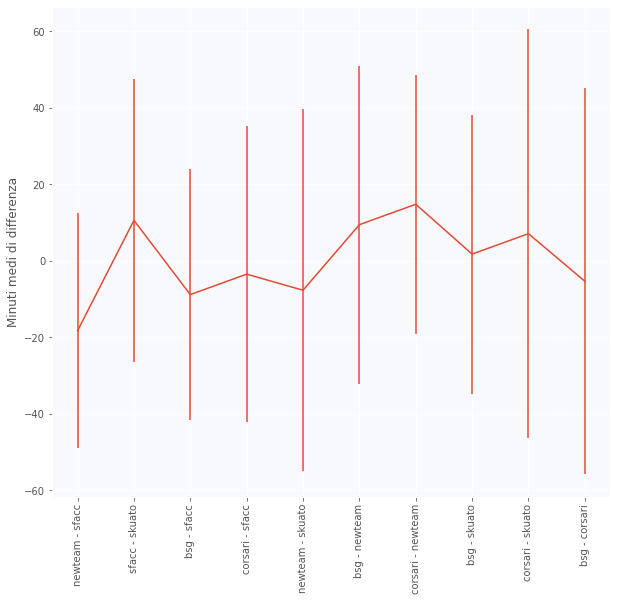

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.errorbar(gauss.label, gauss.mu, yerr=gauss.sigma)
plt.xticks(rotation=90)
ax.set(ylabel="Minuti medi di differenza")
fig.subplots_adjust(bottom=0.2)
plt.savefig("diff.pdf")
plt.show() #blocking
plt.close()

Calcoliamo finalmente i fattori di Bayes per tutte le coppie di squadre e per tutti i valori possibili di $i_1$ e $i_2$. 
In questa fase preliminare, per evidenziare i casi sospetti, tagliamo i risultati ottenuti a 1000 per fissare una scala massima unica per tutti i grafici che saranno realizzati, rendendoli più comodi da leggere. 

Poiché l'ordine degli indizi non è noto a priori, bisogna agire per fasi.

In primo luogo, per ogni coppia di squadre, si determinano gli indizi consegnati a meno di $b$ minuti di distanza (un buon valore è $b = 2a$); tra di essi vengono poi isolate delle sequenze di indizi che le squadre hanno ricevuto consecutivamente.
Solo su queste sequenze (le uniche in cui si può ammettere una collaborazione) avviene il calcolo del fattore di Bayes.

Verrà infine plottato un grafico riassuntivo con una heatmap per ogni coppia di squadre, colorata in base ai fattori di bayes collaborazione/non-collaborazione per ciascun intervallo di indizi $i_1$ e $i_2$ (i cui valori numerici sono tagliati a 1000, vedi sopra).
Gli indizi non considerati nell'analisi bayesiana sono mostrati in colore neutro nel grafico.

Come parametro della distribuzione uniforme (vedi sopra) prendiamo $a = 10 \, \mathrm{min}$ ( ` unif_range `  nel codice), considerando che sia orientativamente l'intervallo di tempo che passa tra il momento in cui una squadra (o due squadre...) risolvono e il momento in cui il comitato riceve la soluzione (che è il dato in nostro possesso).

---
La funzione che calcola i fattori di bayes è completamente vettorizzata; essa prende in input i dataframe con i dati delle due squadre, relativi ad una specifica sequenza $S$ di indizi, e restituisce i fattori di bayes relativi a tutti gli intervalli di indizi contenuti in $S$. Detto $T$ il numero totale degli indizi, l'output della funzione è una matrice $T \times T$ riempita con valori $nan$, tranne che per gli indizi ricevuti in input, numerati riferendosi alla prima squadra (in ordine alfabetico) della coppia.
<br>
Le sequenze $S$ consistono negli indizi dati alle squadre nello stesso ordine, nei quali la differenza massima nei tempi di risoluzione è inferiore a una certa soglia (nel nostro caso 30 minuti).


In [6]:
unif_range = 10
###------------------------------------------------------------------
## Evaluate bayes factors on a single chunck of consecutive riddles
def bayes_factor_one_chunck(
  df0, df1, gauss=gauss,
  pair=None, unif_range=unif_range, riddle_tot=30
):
  # df0 and df1 only contain suspected riddles

  pair = sorted(pair) 
  label = pair[0] + " - " + pair[1]

  time_diff = df0.mins.to_numpy() - df1.mins.to_numpy()

  n_riddles = len(time_diff)
  riddles = np.arange(n_riddles)
  r1, r2 = np.meshgrid(riddles, riddles)
  # we must impose always r2 > r1
  ind = np.triu_indices(n_riddles) # upper triangolar matrix indices
  r1, r2 = r1[ind], r2[ind]

  # max_diff will contain the maxima within all possible intervals,
  #   as an upper triangular matrix - created empty, to be filled later
  max_diff = np.empty((n_riddles, n_riddles)) * np.nan 

  # reductions contains (as couples in a list) 
  # all possible pairs of interval limits (r2 > r2)
  # i.e. 0, 1, 0, 2, 0, 3, ..., 1, 2, ..., 2, 3, ....
  reductions = np.column_stack((r2, r1+1)).ravel()

  # np.ufunc.reduceat applys one ufunc (e.g. add, max, min, multiply, ...)
  # to the slices of an array; the slicings are defined by couples of indices 
  # in a list formatted as $reductions
  max_diff[ind] = np.maximum.reduceat(
    np.append(time_diff, 0), reductions
  )[: : 2]

  duration = np.empty((n_riddles, n_riddles)) * np.nan
  duration[ind] = np.add.reduceat(
    np.ones((n_riddles+1,)), reductions
  )[: : 2]

  # extracting mu and sigma from the Dataframe
  df = gauss[gauss.label==label]
  m, s = df.mu.iloc[0], df.sigma.iloc[0]

  # cumulative density functions
  norm_cum, unif_cum = stats.norm.cdf, stats.uniform.cdf

  ## probability that time differences are less than $max_diff for $duration times,
  # given that there is no fraud (gaussian distribution)
  lhood_no_fraud = (
    norm_cum(max_diff, m, s) 
      - 
    norm_cum(-max_diff, m, s)
  )**duration

  ## probability that time differences are less than $max_diff for $duration times,
  # given that there is a fraud (uniform distribution between -/+$unif_range)
  lhood_fraud = (
      unif_cum(max_diff, - unif_range, unif_range) 
        - 
      unif_cum(- max_diff, - unif_range, unif_range)
  )**duration

  bf = (lhood_fraud+1e-40)/(lhood_no_fraud+1e-40) # summing 1e-40 to avoid 0/0

  ret = np.empty((riddle_tot, riddle_tot)) * np.nan
  # extract first and last riddle numbers
  fr, lr = df0.num.min(), df0.num.max()+1 # numbering following the 1st team 

  ret[fr:lr, fr:lr] = bf

  return ret

In [7]:
def add_ignore_nans(a, b):
  stacked = np.array([a, b])
  res = np.nansum(stacked, axis=0)
  res[np.all(np.isnan(stacked), axis=0)] = np.nan
  return res

In [8]:
def consecutive_chunks(df0, df1):
  df0 = df0.sort_values(["num"])
  df0 = df0.set_index('num')
  df0 = df0.reset_index()

  df1 = df1.set_index('riddle')
  df1 = df1.reindex(index=df0['riddle'])
  df1 = df1.reset_index()

  df_tot = pd.concat([df0, df1])
  df_tot.sort_index(inplace=True)
  df_tot.reset_index(inplace=True)

  s = np.arange(0, len(df0), 0.5).astype("int") # 0, 0, 1, 1, 2, 2, ...

  # returns list of series of consecutives riddles 
  consec_chunks = [
    df.drop_duplicates() for df in [ 
      d[d.duplicated('riddle') | d.duplicated('riddle', keep='last')].riddle 
        for _, d in df_tot.groupby(df_tot.sort_index().num - s)
    ]
    if len(df) > 2
  ] 
  return consec_chunks

In [14]:
threshold = 10 # maximum time difference allowed in case of fraud

def bayes_factor_all(dfs, pair, unif_range=unif_range):
  df0, df1 = dfs[pair[0]], dfs[pair[1]]
  riddle_tot = len(df0)+1

  ind = (df0.mins - df1.mins).abs() < threshold
  df0 = df0[ind]
  df1 = df1[ind]
  
  consec_chunks = consecutive_chunks(df0, df1)

  bf_mat = np.empty((riddle_tot, riddle_tot))*np.nan
  for chk in consec_chunks:
    temp1 = df0.merge(chk, on=['riddle'], how='inner')
    temp2 = df1.merge(chk, on=['riddle'], how='inner')
    bf_mat = add_ignore_nans(
      bf_mat, bayes_factor_one_chunck(
        temp1, temp2,
        pair = pair,
        riddle_tot = riddle_tot,
      )
    )
  return bf_mat

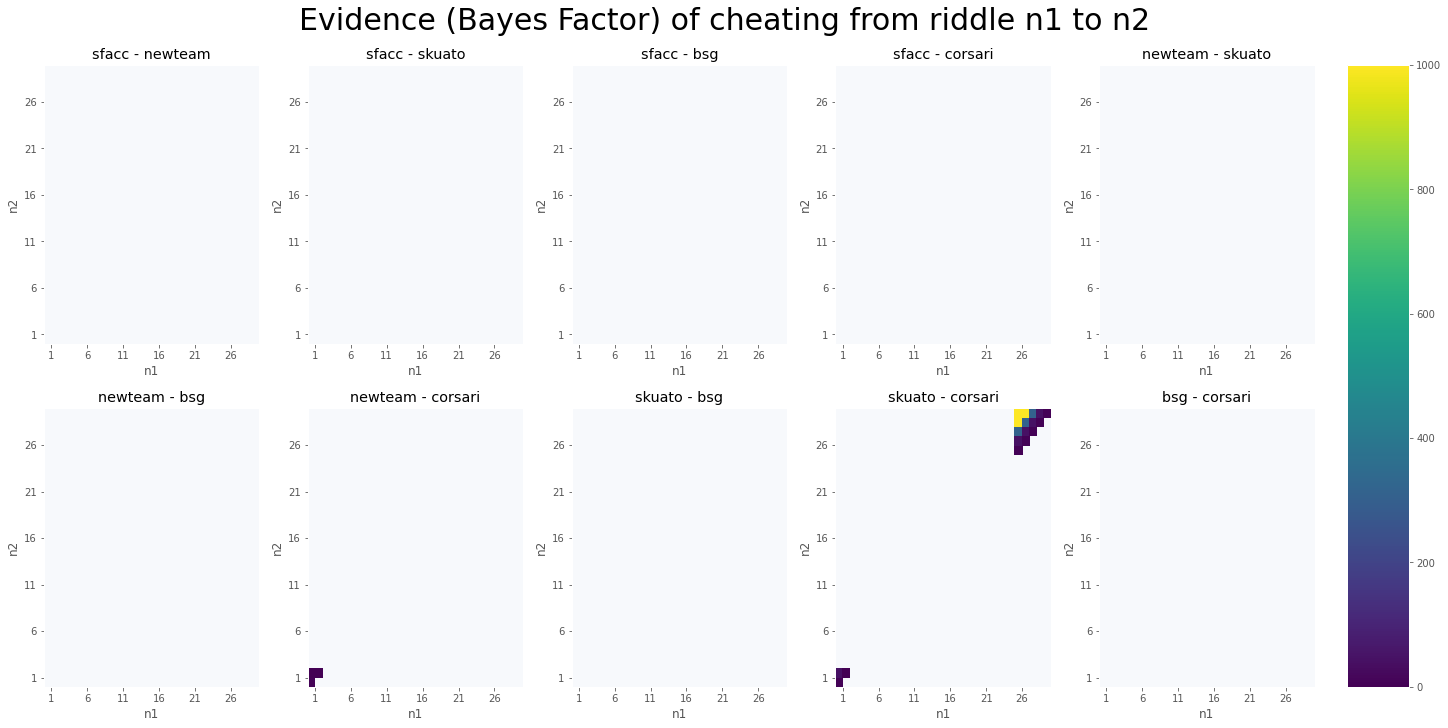

In [15]:
start, end = 1, 29
ticks = np.arange(start, end+1, 5)
fig, axs = plt.subplots(*axs_shape, figsize=figsize, constrained_layout=True)
i = 0
# iterating over all couples of teams
for pair in itertools.combinations(dfs.keys(), 2):
  ax = axs[i//5, i%5]
  bf_mat = bayes_factor_all(dfs, pair)
  im = ax.pcolormesh(bf_mat.T, vmin=0, vmax=1000) #normalizing on the threshold
  ax.set(
    xticks=ticks, yticks=ticks, 
    xlabel="n1", ylabel="n2", 
    title = pair[0] + " - " + pair[1]
  )
  i += 1

fig.suptitle("Evidence (Bayes Factor) of cheating from riddle n1 to n2", fontsize=30)
plt.savefig(f"bayes.pdf")
fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()
plt.close()

Come si vede dal grafico, l'unico segnale abbastanza forte da poter essere considerato significativo si riferisce a corsari e skuato, tra il 24-esimo ed il 29-esimo indizio. Riplottiamo dunque solo il grafico relativo a queste due squadre, evitando di clippare i valori a 1000.

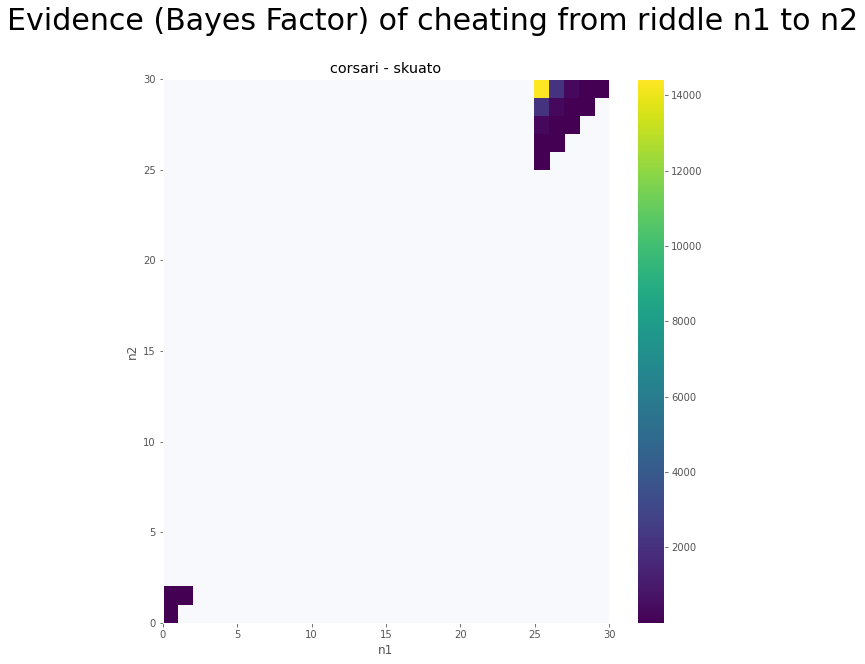

In [11]:
pair = ["corsari", "skuato"]
fig, ax = plt.subplots(figsize=(10, 10))

bf_mat = bayes_factor_all(dfs, pair)
im = ax.pcolormesh(bf_mat.T)

ax.set(xlabel="n1", ylabel="n2", title = pair[0] + " - " + pair[1])
fig.suptitle("Evidence (Bayes Factor) of cheating from riddle n1 to n2", fontsize=30)
fig.colorbar(im)
plt.savefig(f"bayes-corsari-skuato.pdf")
plt.show()
plt.close()

# Conclusioni

L'evidenza a favore di una collaborazione tra `corsari` e `skuato` tra il $24$-esimo ed il $29$-esimo indizio risulta statisticamente significativa, essendo il fattore di Bayes relativo 14000.